<a href="https://colab.research.google.com/github/aditichadha/Machine-Learning/blob/main/Time_series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The objective of this time series analysis is to extract features for human activity. We have been given [human activity data](https://www.uni-mannheim.de/dws/research/projects/activity-recognition/#dataset_realworld) for 15 subjects at activity-level such as walking, running, climbing up and climbing down

We will use Time Series Representation Methods:
1. Natural Visibility Graphs
2. Horizontal Visibility Graphs


### Installing necessary libraries

In [1]:
!pip install ts2vg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.4 MB/s eta 0:00:00


In [2]:
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.3 MB/s eta 0:00:00


In [3]:
!pip install pycairo
!pip install cairocffi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.9/346.9 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.8 MB/s eta 0:00:00


In [4]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
main_path = '/content/gdrive/MyDrive/1. My Masters course/FDA/Timeseries/Project 2/Task -1 Data/'
subjects = ['Subject_1','Subject_2','Subject_3','Subject_5','Subject_6','Subject_8','Subject_9','Subject_10','Subject_11','Subject_12','Subject_15']
other_sub = ['Subject_4','Subject_7','Subject_13','Subject_14']
files = ['acc_walking_csv','acc_running_csv','acc_climbingup_csv','acc_climbingdown_csv']

Code to unzip and extract files (one time use only)

In [ ]:
# for sub in subjects:
#   for zipped in files:
#     path = main_path  + sub + str('/') + zipped + str('.zip')
#     with ZipFile(path,'r') as zippedobj:
#       zippedobj.extractall(main_path+sub)

### Importing datasets of 15 subjects, w.r.t activity pursued and body part:


*   Activity : Walking, running
*   Body part (where accelerometer was placed) : Head, Chest



Creating string names for the csv file:


*   We will use these file names to add to the path and read and extract files



In [ ]:
csv_list = []
body_parts = ['chest','head']
for part in body_parts:
  for file in files :
    t = str('acc_') + file.split('_')[1] + str('_') + part + str('.csv')
    csv_list.append(t)
csv_list

['acc_walking_chest.csv',
 'acc_running_chest.csv',
 'acc_climbingup_chest.csv',
 'acc_climbingdown_chest.csv',
 'acc_walking_head.csv',
 'acc_running_head.csv',
 'acc_climbingup_head.csv',
 'acc_climbingdown_head.csv']

#### Creating a dictionary and storing the dataframe in the dictionary as values w.r.t dynamic keys (printed)

In [ ]:
new_subjects = subjects + other_sub
df_dict = {}

for sub in new_subjects:
  p = main_path + sub
  for csv in csv_list:
    s = (sub + '_'+ csv).split('.')[0]
    temp  =   p + str('/') + csv
    vars()[s] =  pd.DataFrame()
    vars()[s] =  pd.read_csv(temp)
    df_dict[s] = vars()[s]

for key in df_dict.keys():
  print(key)


Subject_1_acc_walking_chest
Subject_1_acc_running_chest
Subject_1_acc_climbingup_chest
Subject_1_acc_climbingdown_chest
Subject_1_acc_walking_head
Subject_1_acc_running_head
Subject_1_acc_climbingup_head
Subject_1_acc_climbingdown_head
Subject_2_acc_walking_chest
Subject_2_acc_running_chest
Subject_2_acc_climbingup_chest
Subject_2_acc_climbingdown_chest
Subject_2_acc_walking_head
Subject_2_acc_running_head
Subject_2_acc_climbingup_head
Subject_2_acc_climbingdown_head
Subject_3_acc_walking_chest
Subject_3_acc_running_chest
Subject_3_acc_climbingup_chest
Subject_3_acc_climbingdown_chest
Subject_3_acc_walking_head
Subject_3_acc_running_head
Subject_3_acc_climbingup_head
Subject_3_acc_climbingdown_head
Subject_5_acc_walking_chest
Subject_5_acc_running_chest
Subject_5_acc_climbingup_chest
Subject_5_acc_climbingdown_chest
Subject_5_acc_walking_head
Subject_5_acc_running_head
Subject_5_acc_climbingup_head
Subject_5_acc_climbingdown_head
Subject_6_acc_walking_chest
Subject_6_acc_running_chest


In [ ]:
len(df_dict.keys())

120

## Task 1

1. Apply natural visibility graph (NVG) and horizontal visibility graph (HVG) to the
aforementioned data
2. Compute average degree, network diameter, and average path length
3. For the above computations select sample size of 1024 data points ( from 1000
to 2024) for each of the 15 time series
4. Tabulate all the results
5. Generate scatter plots: average degree vs network diameter and color the points
according to walking and running (do this for each accelerometer signal and
each method (HVH and NVG))
6. Generate scatter plots: average degree vs network diameter and color the points
according to climbing up and climbing down (do this for each accelerometer
signal and each method (HVH and NVG))

## Part 1: Apply natural visibility graph (NVG) and horizontal visibility graph (HVG) to the required data

In [ ]:
def natural_vg(time_series):
  vg = NaturalVG()
  vg.build(time_series)
  vg_graph = vg.as_igraph()
  avg_deg = np.mean(vg_graph.degree())
  net_dia = vg_graph.diameter()
  avg_path_length = vg_graph.average_path_length()
  return avg_deg,net_dia, avg_path_length


In [ ]:
def horizontal_vg(time_series):
  vg = HorizontalVG()
  vg.build(time_series)
  vg_graph = vg.as_igraph()
  avg_deg = np.mean(vg_graph.degree())
  net_dia = vg_graph.diameter()
  avg_path_length = vg_graph.average_path_length()
  return avg_deg,net_dia, avg_path_length

### Creating required output dataframe for 'Head' body part

In [ ]:
head_dataset = pd.DataFrame(columns=['Method','Subject','Accelerometer_axis','Avg_degree','Network_Diameter','Avg_Path_length','Activity'])
head_keys = [x for x in df_dict.keys() if x.split('_')[4] in ['head']]
for key in head_keys:
  num = key.split('_')[1]
  sub = 'Subject' + str(num)
  activity = key.split('_')[3]
  for var in ['attr_x','attr_y','attr_z']:
    axis = var.split('_')[1]
    ts = df_dict[key].loc[1000:2024,var]
    ndeg, nnet_diamter, n_avg_p_lgth = natural_vg(ts)
    head_dataset.loc[len(head_dataset)] =['NVG', sub, axis, ndeg, nnet_diamter, n_avg_p_lgth, activity]
    hdeg, hnet_diamter, h_avg_p_lgth = horizontal_vg(ts)
    head_dataset.loc[len(head_dataset)] =['HVG', sub, axis, hdeg, hnet_diamter, h_avg_p_lgth, activity]


### Output table for Head : Method, Subject, Accelorometer axis, Average degree, Network diameter, Avg path length, Activity

In [ ]:
head_dataset

,Method,Subject,Accelerometer_axis,Avg_degree,Network_Diameter,Avg_Path_length,Activity
0,NVG,Subject1,x,12.481951,12,4.526515,walking
1,HVG,Subject1,x,3.947317,35,16.419466,walking
2,NVG,Subject1,y,13.178537,9,4.284537,walking
3,HVG,Subject1,y,3.966829,24,10.074160,walking
4,NVG,Subject1,z,12.965854,13,5.152683,walking
...,...,...,...,...,...,...,...
355,HVG,Subject14,x,3.964878,23,10.230246,climbingdown
356,NVG,Subject14,y,12.766829,12,4.842428,climbingdown
357,HVG,Subject14,y,3.927805,35,14.391925,climbingdown
358,NVG,Subject14,z,12.439024,9,4.714223,climbingdown


### Average degree Vs Network diamater plots for (walking, running) activities w.r.t 'Head' body part



In [ ]:
subject_list = (head_dataset['Subject'].unique()).tolist()
methods = (head_dataset['Method'].unique()).tolist()
axis = (head_dataset['Accelerometer_axis'].unique()).tolist()


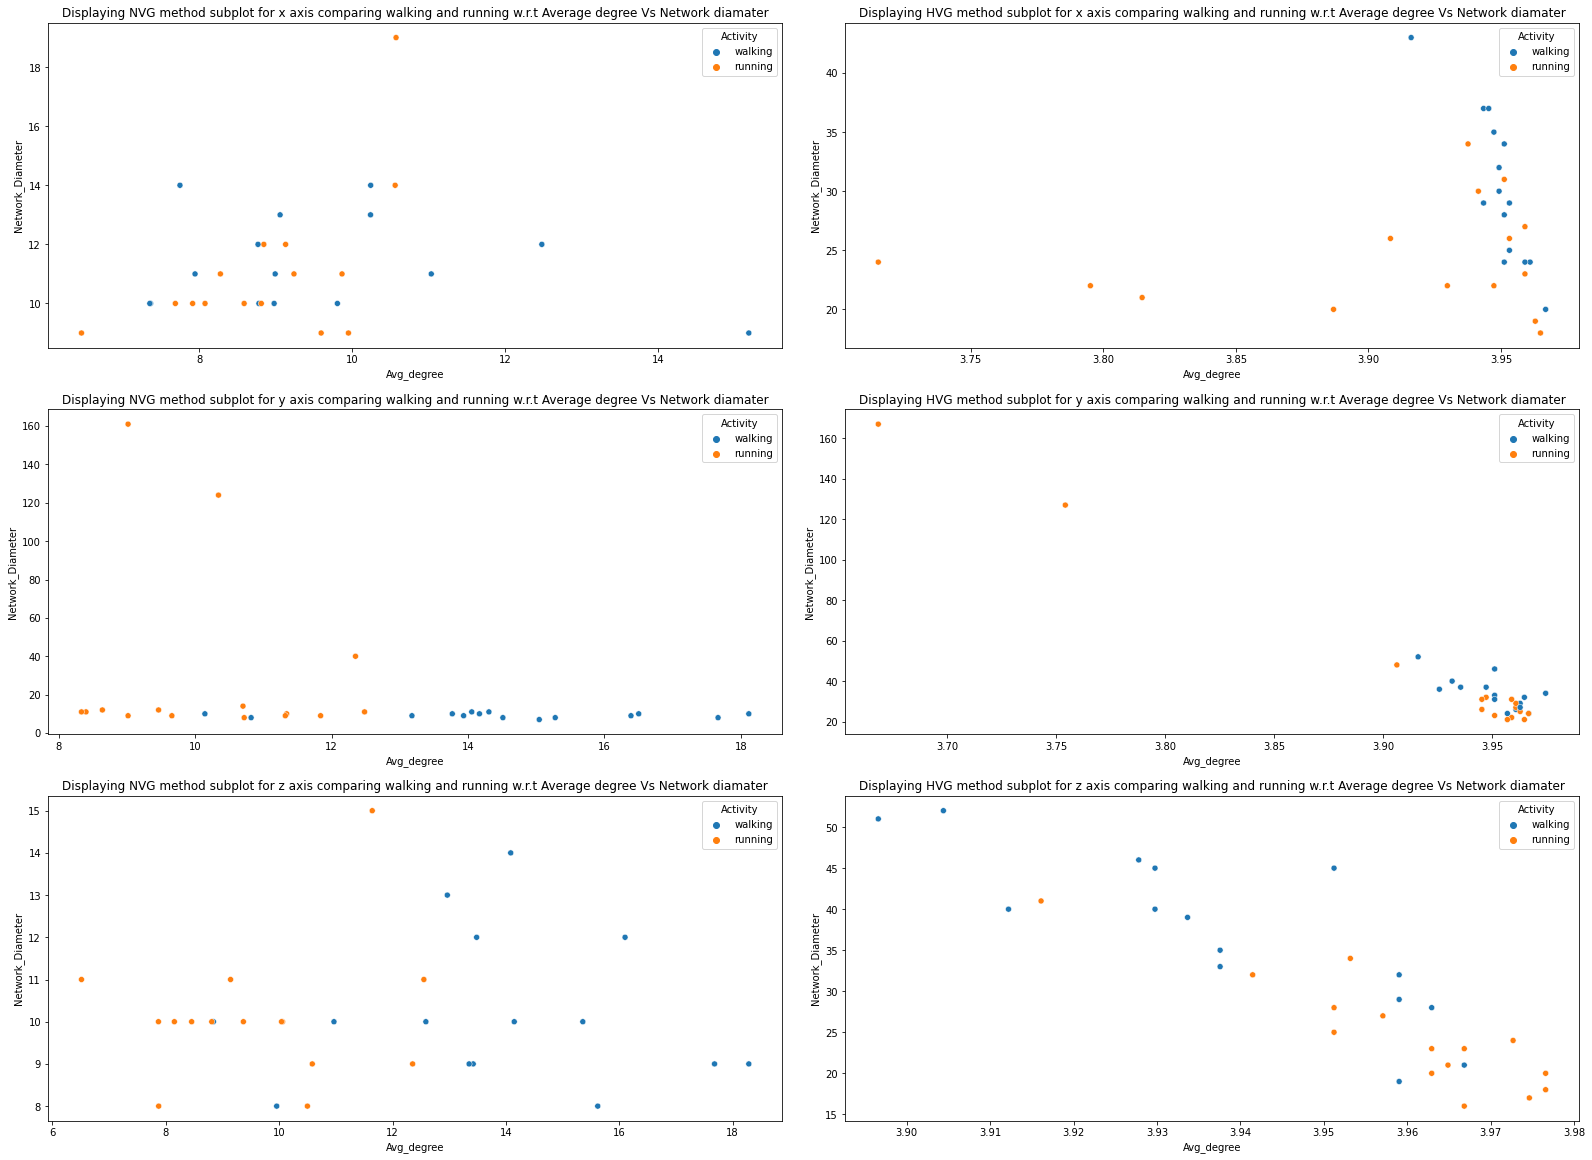

In [ ]:
part_5_activity = ['walking','running']
g, sub_df = plt.subplots(3, 2, figsize=(22, 16),constrained_layout = True)
s_x = 0
s_y = 0
for axx in axis:
  s_y = 0
  for m in methods:
    temp_df = head_dataset[(head_dataset.Subject.isin(subject_list)) & (head_dataset.Activity.isin(['walking','running']))
                          & (head_dataset['Accelerometer_axis']==axx) & (head_dataset['Method']==m)]
    title = "Displaying {} method subplot for {} axis comparing walking and running w.r.t Average degree Vs Network diamater".format(m,axx)
    sns.scatterplot(ax = sub_df[s_x][s_y],data = temp_df, x='Avg_degree', y='Network_Diameter', hue = 'Activity').set_title(title)
    s_y = s_y + 1
  s_x = s_x +1


### Average degree Vs Network diamater plots for (climbingup, climbingdown) activities w.r.t 'Head' body part

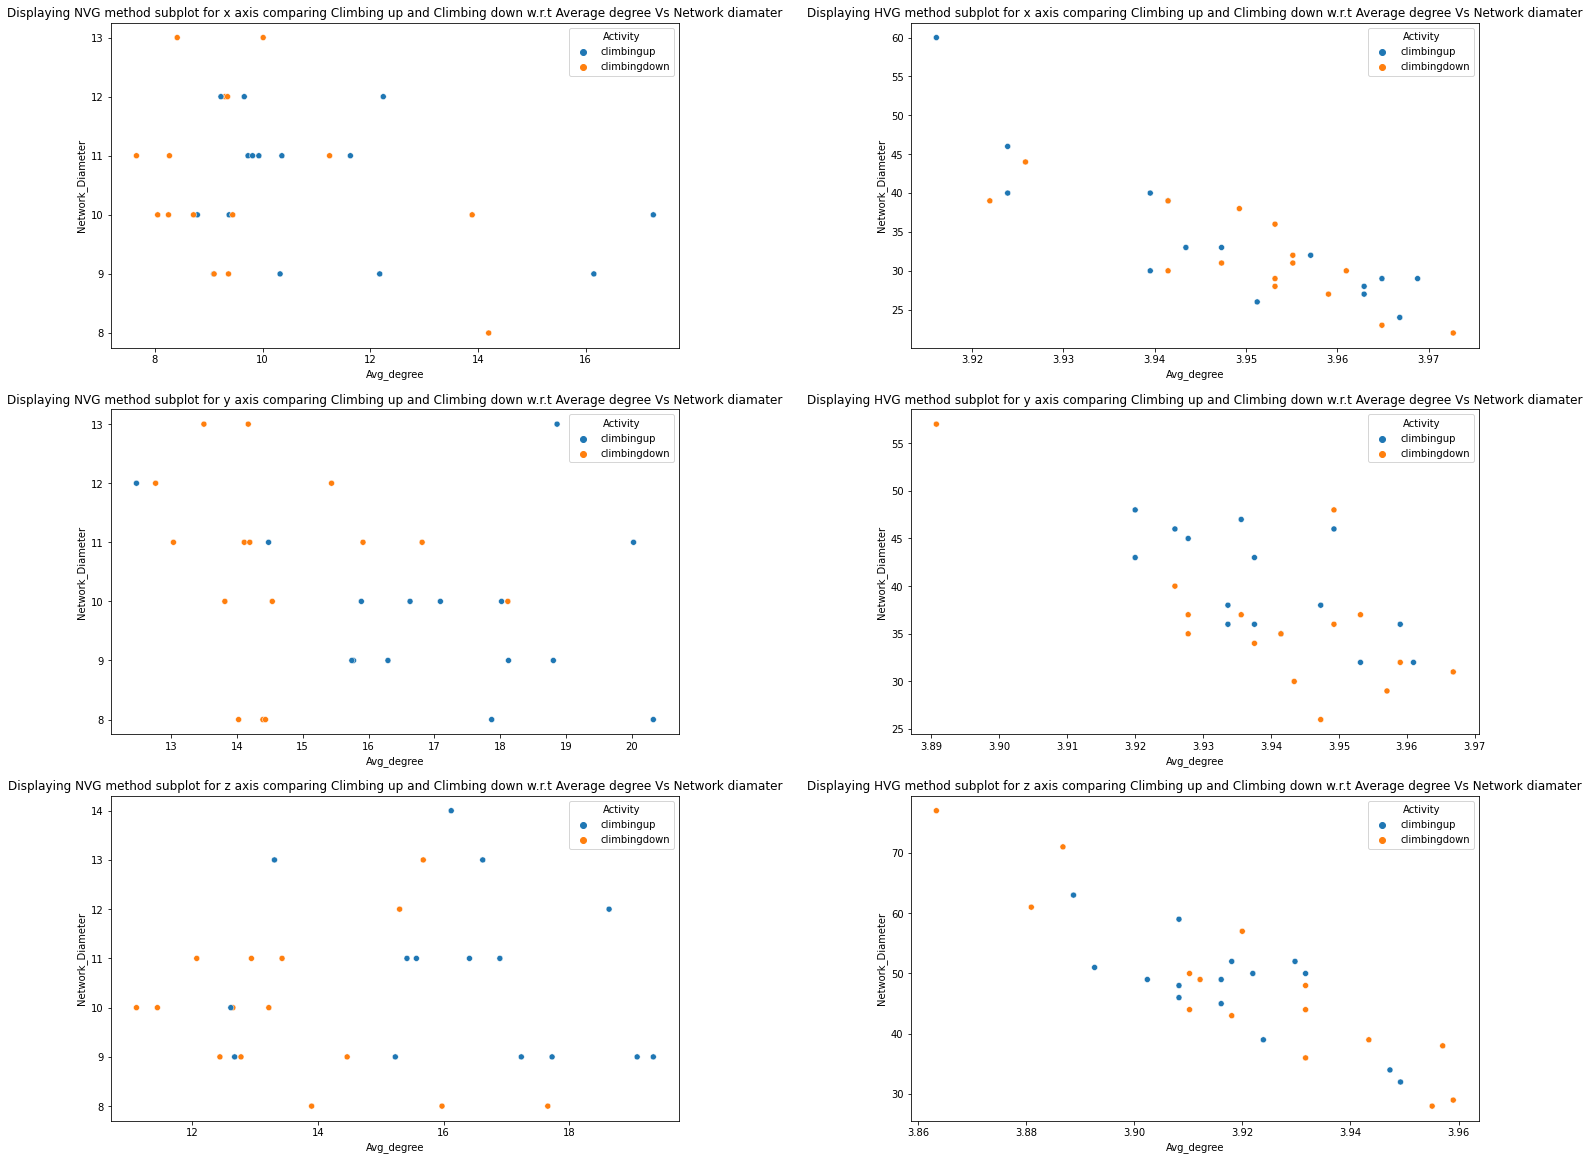

In [ ]:
part_6_activity = ['climbingup','climbingdown']
g, sub_df = plt.subplots(3, 2, figsize=(22, 16),constrained_layout = True)
s_x = 0
s_y = 0
for axx in axis:
  s_y = 0
  for m in methods:
    temp_df = head_dataset[(head_dataset.Subject.isin(subject_list)) & (head_dataset.Activity.isin(part_6_activity))
                          & (head_dataset['Accelerometer_axis']==axx) & (head_dataset['Method']==m)]
    title = "Displaying {} method subplot for {} axis comparing Climbing up and Climbing down w.r.t Average degree Vs Network diamater".format(m,axx)
    sns.scatterplot(ax = sub_df[s_x][s_y],data = temp_df, x='Avg_degree', y='Network_Diameter', hue = 'Activity').set_title(title)
    s_y = s_y + 1
  s_x = s_x +1

### Creating output dataframe for 'Chest' body part

In [ ]:
chest_dataset = pd.DataFrame(columns=['Method','Subject','Accelerometer_axis','Avg_degree','Network_Diameter','Avg_Path_length','Activity'])
chest_keys = [x for x in df_dict.keys() if x.split('_')[4] in ['chest']]
for key in chest_keys:
  num = key.split('_')[1]
  sub = 'Subject' + str(num)
  activity = key.split('_')[3]
  for var in ['attr_x','attr_y','attr_z']:
    axis = var.split('_')[1]
    ts = df_dict[key].loc[1000:2024,var]
    ndeg, nnet_diamter, n_avg_p_lgth = natural_vg(ts)
    chest_dataset.loc[len(chest_dataset)] =['NVG', sub, axis, ndeg, nnet_diamter, n_avg_p_lgth, activity]
    hdeg, hnet_diamter, h_avg_p_lgth = horizontal_vg(ts)
    chest_dataset.loc[len(chest_dataset)] =['HVG', sub, axis, hdeg, hnet_diamter, h_avg_p_lgth, activity]

In [ ]:
subject_list = (chest_dataset['Subject'].unique()).tolist()
methods = (chest_dataset['Method'].unique()).tolist()
axis = (chest_dataset['Accelerometer_axis'].unique()).tolist()

In [ ]:
chest_dataset

,Method,Subject,Accelerometer_axis,Avg_degree,Network_Diameter,Avg_Path_length,Activity
0,NVG,Subject1,x,11.443902,10,4.446633,walking
1,HVG,Subject1,x,3.957073,26,11.584668,walking
2,NVG,Subject1,y,11.986341,9,4.244055,walking
3,HVG,Subject1,y,3.953171,22,10.673826,walking
4,NVG,Subject1,z,8.569756,10,4.899920,walking
...,...,...,...,...,...,...,...
355,HVG,Subject14,x,3.964878,21,9.130482,climbingdown
356,NVG,Subject14,y,10.280976,64,22.696059,climbingdown
357,HVG,Subject14,y,3.859512,76,27.181791,climbingdown
358,NVG,Subject14,z,8.187317,11,4.985998,climbingdown


### Average degree Vs Network diameter plots for (Walking Vs running) activities w.r.t 'Chest' body part

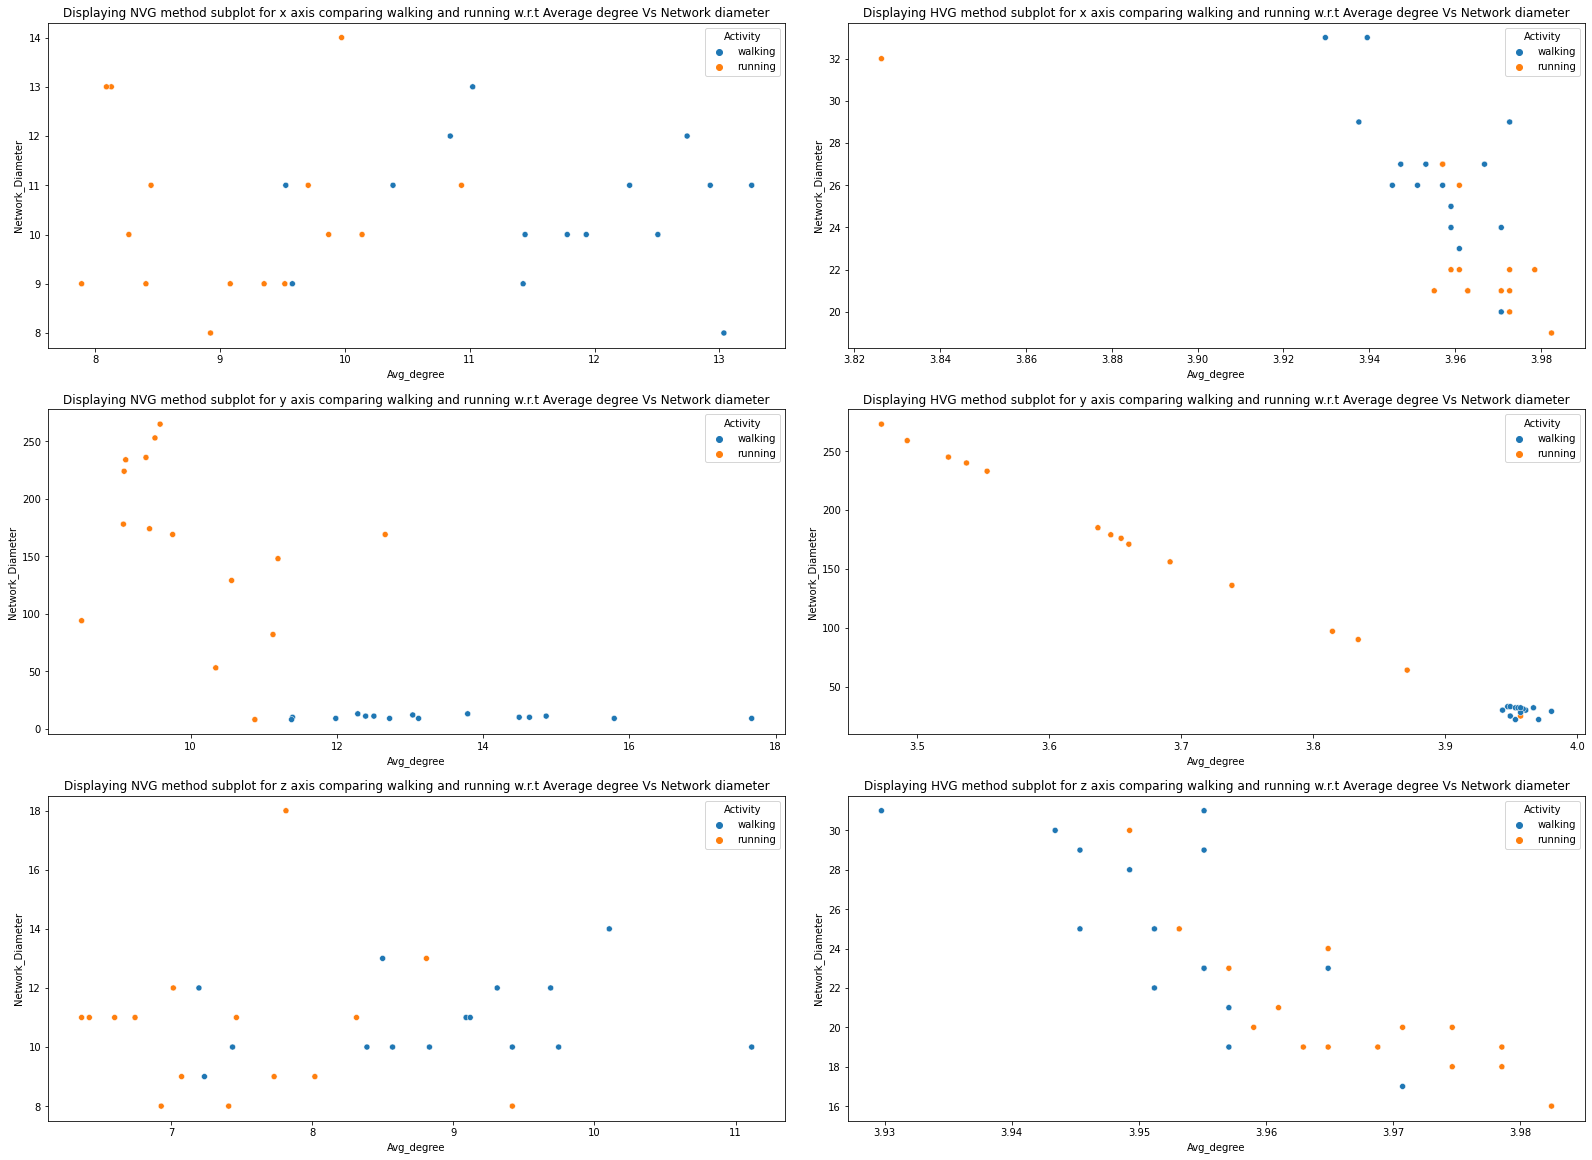

In [ ]:
part_5_activity = ['walking','running']
g, n_df = plt.subplots(3, 2, figsize=(22, 16),constrained_layout = True)
s_x = 0
s_y = 0
for axx in axis:
  s_y = 0
  for m in methods:
    temp_df = chest_dataset[(chest_dataset.Subject.isin(subject_list)) & (chest_dataset.Activity.isin(part_5_activity))
                          & (chest_dataset['Accelerometer_axis']==axx) & (chest_dataset['Method']==m)]
    title = "Displaying {} method subplot for {} axis comparing walking and running w.r.t Average degree Vs Network diameter".format(m,axx)
    sns.scatterplot(ax = n_df[s_x][s_y], data = temp_df, x='Avg_degree', y='Network_Diameter', hue = 'Activity').set_title(title)
    s_y = s_y + 1
  s_x = s_x +1


### Average degree Vs Network diamater plots for (Climbing up , Cimbing down) activities w.r.t 'Chest' body part

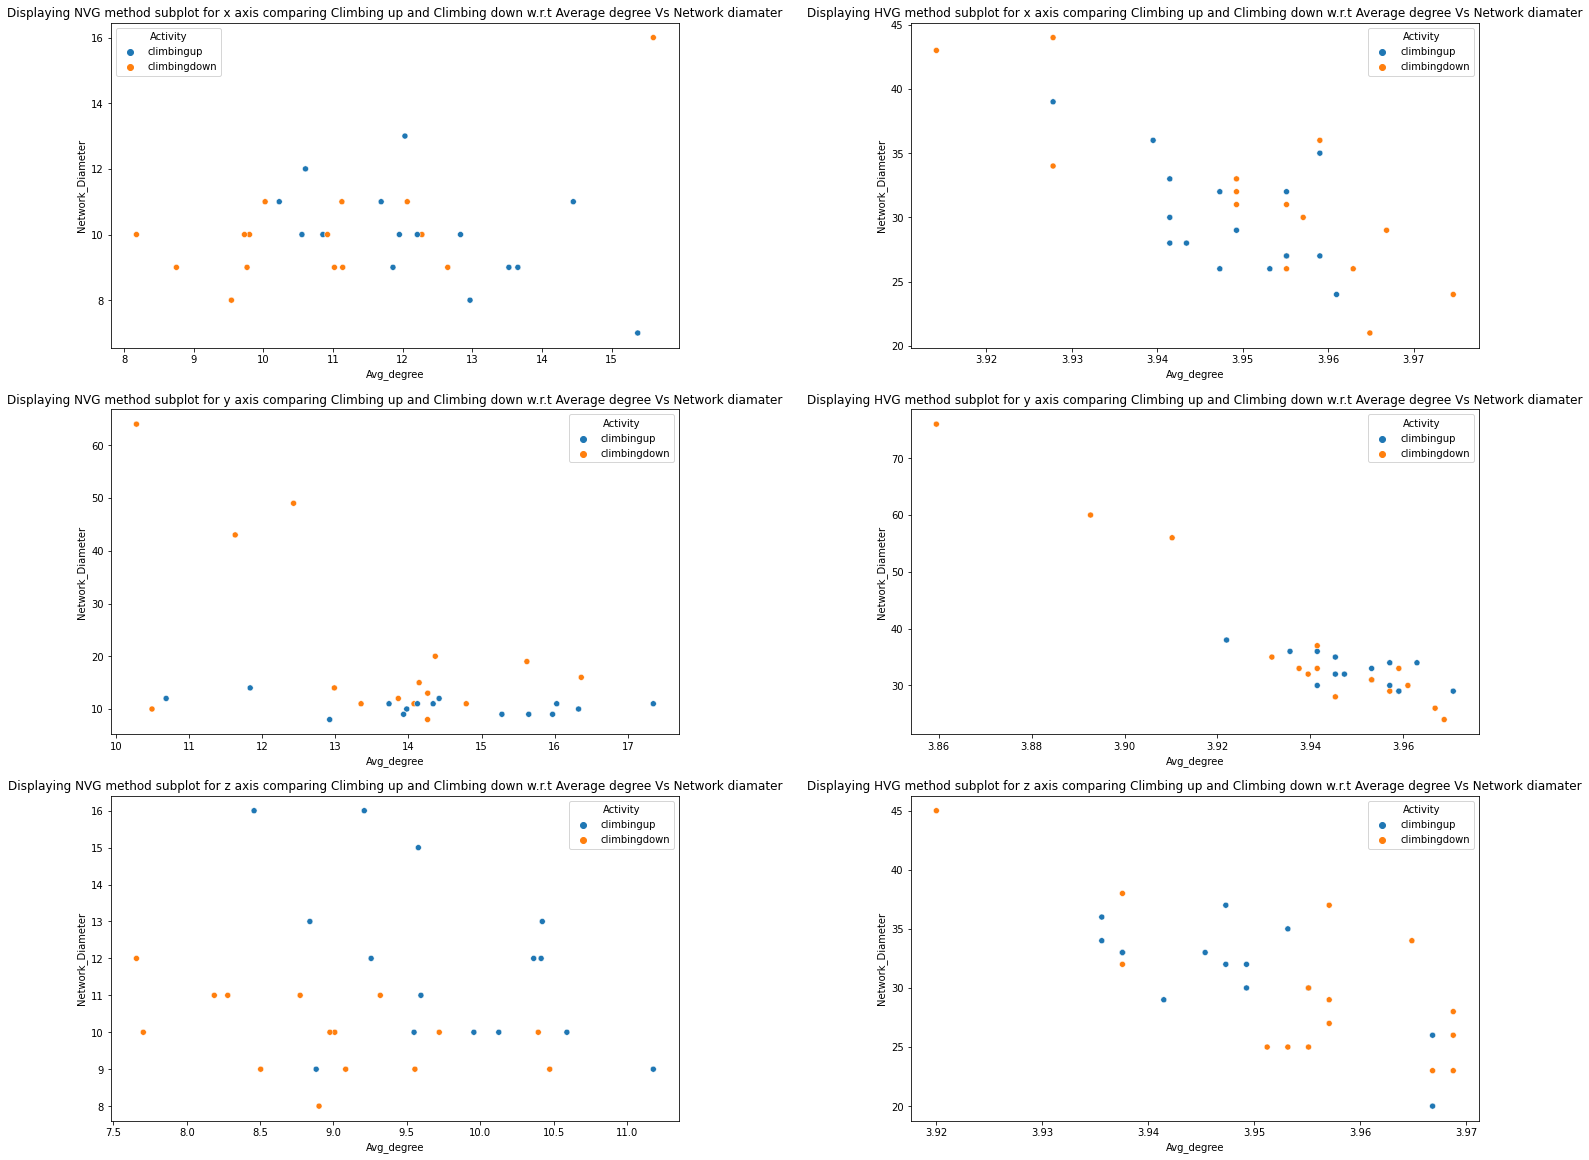

In [ ]:
part_6_activity = ['climbingup','climbingdown']
g, sub_df = plt.subplots(3, 2, figsize=(22, 16),constrained_layout = True)
s_x = 0
s_y = 0
for axx in axis:
  s_y = 0
  for m in methods:
    temp_df = chest_dataset[(chest_dataset.Subject.isin(subject_list)) & (chest_dataset.Activity.isin(part_6_activity))
                          & (chest_dataset['Accelerometer_axis']==axx) & (chest_dataset['Method']==m)]
    title = "Displaying {} method subplot for {} axis comparing Climbing up and Climbing down w.r.t Average degree Vs Network diamater".format(m,axx)
    sns.scatterplot(ax = sub_df[s_x][s_y],data = temp_df, x='Avg_degree', y='Network_Diameter', hue = 'Activity').set_title(title)
    s_y = s_y + 1
  s_x = s_x +1

## **Task 2**

1. Compute permutation entropy and complexity for the aforementioned data.
Consider the accelerometer data in all three directions
2. Vary the following parameters
      - Embedded Dimension 3, 4, 5, 6
      - Embedded Delay 1, 2, 3
      - Signal length 1024, 2048, 4096
3. Generate scatter plots: permutation entropy vs complexity and color the points
according to walking and running (for signal length =4096, embedded delay = 1,
and embedded dimension = 3, 4, 5, 6, and all three accelerometer directions)
4. Generate scatter plots: permutation entropy vs complexity and color the points
according to climbing up and climbing down (for signal length =4096, embedded
delay = 1, and embedded dimension = 3, 4, 5, 6, all three accelerometer
directions)

In [ ]:
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

In [ ]:
def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

In [ ]:
def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])

In [ ]:
def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

In [ ]:
def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [ ]:
def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :]
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])

## Generating Sample output table for Permuatation entropy Vs Complexity for 'Head' body part varying embedded dimension, Embedded delay and Signal Length

In [ ]:
emb_dim = [3,4,5,6]
emd_delay = [1,2,3]
signal_length = [1024,2048,4096]


In [ ]:
entropy_head = pd.DataFrame(columns=['Subject','Accelerometer_Axis', 'Signal_Length','Dimension','Delay','Permutation_entropy','Complexity','Activity'])
head_keys = [x for x in df_dict.keys() if x.split('_')[4] in ['head']]
for key in head_keys:
  num = key.split('_')[1]
  sub = 'Subject' + str(num)
  activity = key.split('_')[3]
  for var in ['attr_x','attr_y','attr_z']:
    axis = var.split('_')[1]
    for sig in signal_length:
      x = 1000 + sig
      for dim in emb_dim:
        for delay in emd_delay:
          ts = df_dict[key].loc[1000:x,var]
          od_pattern = ordinal_patterns(ts,dim,delay)
          perm_entropy = p_entropy(od_pattern)
          complx = complexity(od_pattern)
          entropy_head.loc[len(entropy_head)] =[sub, axis, sig, dim, delay, perm_entropy, complx , activity]

#### Sample Output data for 'Head'

In [ ]:
entropy_head

,Subject,Accelerometer_Axis,Signal_Length,Dimension,Delay,Permutation_entropy,Complexity,Activity
0,Subject1,x,1024,3,1,0.848600,0.123917,walking
1,Subject1,x,1024,3,2,0.905589,0.081572,walking
2,Subject1,x,1024,3,3,0.932996,0.058034,walking
3,Subject1,x,1024,4,1,0.789946,0.193015,walking
4,Subject1,x,1024,4,2,0.852767,0.149910,walking
...,...,...,...,...,...,...,...,...
6475,Subject14,z,4096,5,2,0.783278,0.268070,climbingdown
6476,Subject14,z,4096,5,3,0.864377,0.207421,climbingdown
6477,Subject14,z,4096,6,1,0.711525,0.298322,climbingdown
6478,Subject14,z,4096,6,2,0.821352,0.268093,climbingdown


In [ ]:
subject_list = (entropy_head['Subject'].unique()).tolist()
axis = (entropy_head['Accelerometer_Axis'].unique()).tolist()
emb_dim = [3,4,5,6]

#### Permutation entropy Vs Complexity plots for Walking and Running for 'Head'
Variables varied:

*   axis (x,y,z), embedded dimension (3,4,5,6)

Variables fixed:


*   Embdedded delay (1), Signal length (4096)


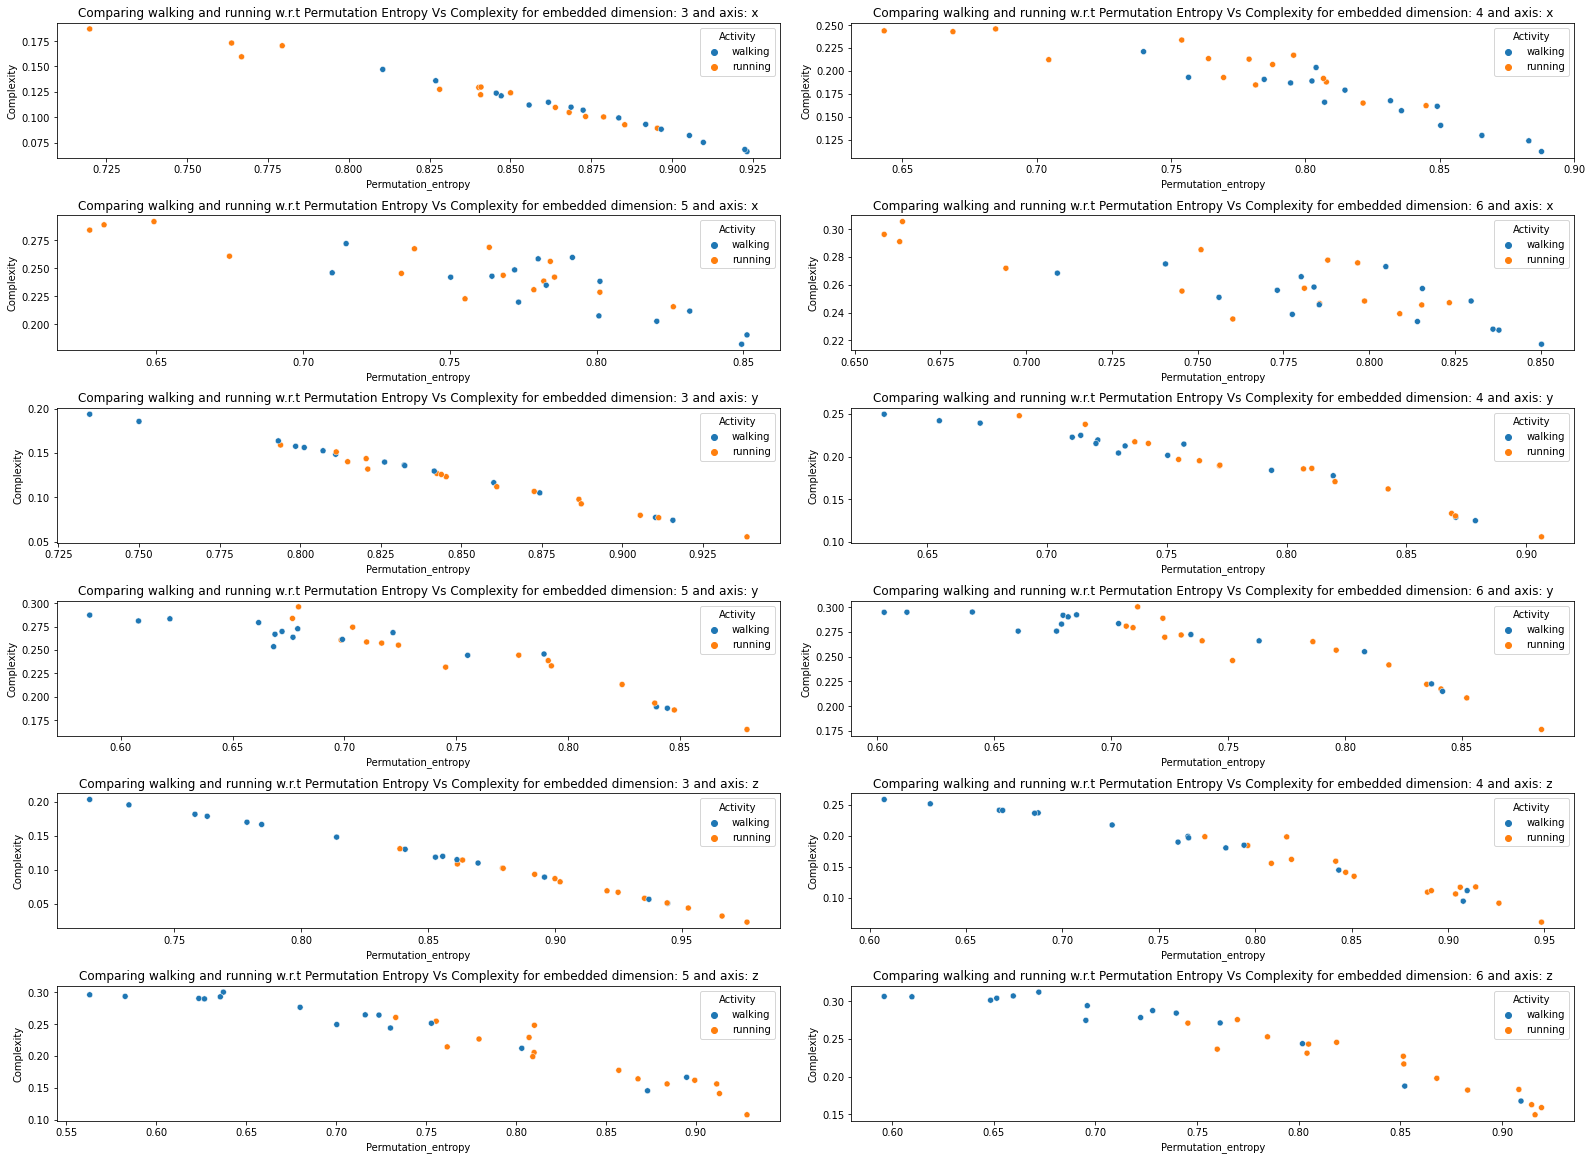

In [ ]:
part_3_activity = ['walking','running']
g, e_df = plt.subplots(6, 2, figsize=(22, 16),constrained_layout = True)
s_x = 0
s_y = 0
for axx in axis:
  #s_y = 0
  for dim in emb_dim:
    temp_df = entropy_head[(entropy_head.Subject.isin(subject_list)) & (entropy_head.Activity.isin(part_3_activity))
                          & (entropy_head['Accelerometer_Axis']==axx) & (entropy_head['Dimension']==dim) & (entropy_head['Signal_Length']==4096) & (entropy_head['Delay']==1)]
    title = "Comparing walking and running w.r.t Permutation Entropy Vs Complexity for embedded dimension: {} and axis: {}".format(dim,axx)
    sns.scatterplot(ax = e_df[s_x][s_y], data = temp_df, x='Permutation_entropy', y='Complexity', hue = 'Activity').set_title(title)
    s_y = s_y + 1
    if s_y>1:
      s_y = 0
      s_x = s_x + 1


#### Permutation entropy Vs Complexity plots for Climbing down and Climbing up for 'Head'
Variables varied:

*   axis (x,y,z), embedded dimension (3,4,5,6)

Variables fixed:


*   Embdedded delay (1), Signal length (4096)

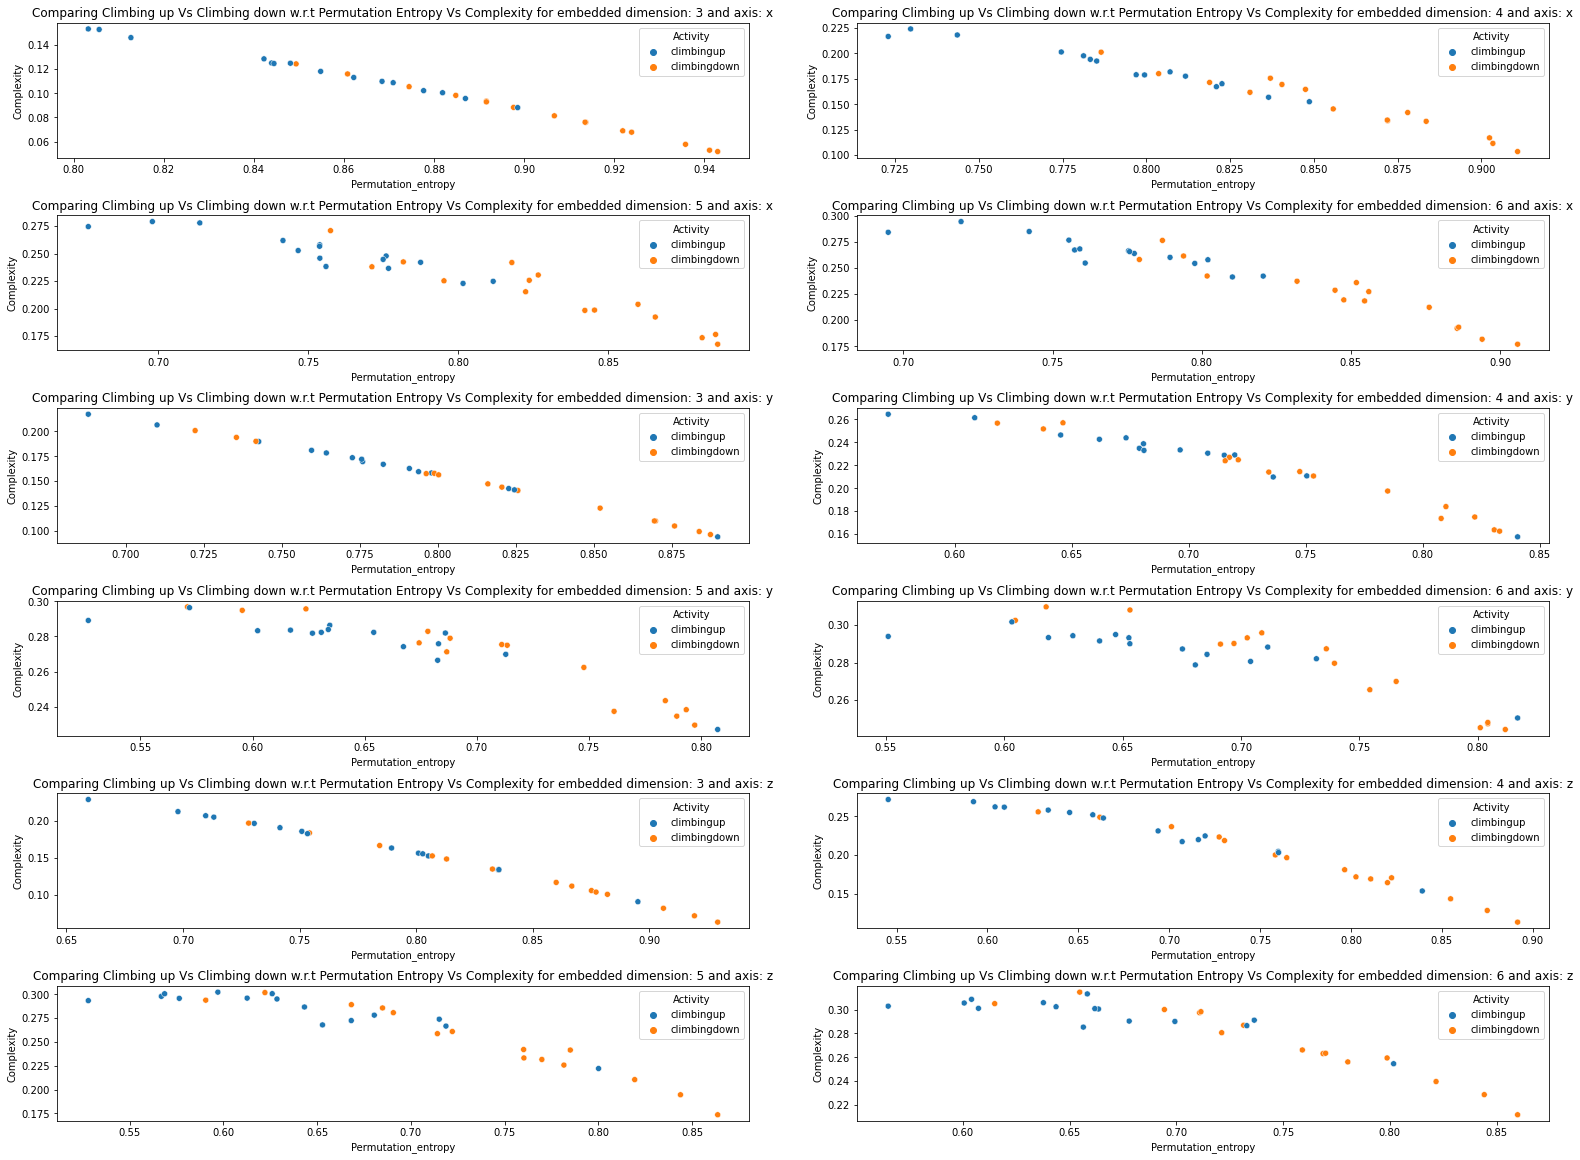

In [ ]:
part_4_activity = ['climbingdown','climbingup']
g, e_df = plt.subplots(6, 2, figsize=(22, 16),constrained_layout = True)
s_x = 0
s_y = 0
for axx in axis:
  #s_y = 0
  for dim in emb_dim:
    temp_df = entropy_head[(entropy_head.Subject.isin(subject_list)) & (entropy_head.Activity.isin(part_4_activity))
                          & (entropy_head['Accelerometer_Axis']==axx) & (entropy_head['Dimension']==dim) & (entropy_head['Signal_Length']==4096) & (entropy_head['Delay']==1)]
    title = "Comparing Climbing up Vs Climbing down w.r.t Permutation Entropy Vs Complexity for embedded dimension: {} and axis: {}".format(dim,axx)
    sns.scatterplot(ax = e_df[s_x][s_y], data = temp_df, x='Permutation_entropy', y='Complexity', hue = 'Activity').set_title(title)
    s_y = s_y + 1
    if s_y>1:
      s_y = 0
      s_x = s_x + 1

## Generating Sample output table for Permuatation entropy Vs Complexity for '**Chest**' body part varying embedded dimension, Embedded delay and Signal Length

In [ ]:
emb_dim = [3,4,5,6]
emd_delay = [1,2,3]
signal_length = [1024,2048,4096]

In [ ]:
entropy_chest = pd.DataFrame(columns=['Subject','Accelerometer_Axis', 'Signal_Length','Dimension','Delay','Permutation_entropy','Complexity','Activity'])
chest_keys = [x for x in df_dict.keys() if x.split('_')[4] in ['chest']]
for key in chest_keys:
  num = key.split('_')[1]
  sub = 'Subject' + str(num)
  activity = key.split('_')[3]
  for var in ['attr_x','attr_y','attr_z']:
    axis = var.split('_')[1]
    for sig in signal_length:
      x = 1000 + sig
      for dim in emb_dim:
        for delay in emd_delay:
          ts = df_dict[key].loc[1000:x,var]
          od_pattern = ordinal_patterns(ts,dim,delay)
          perm_entropy = p_entropy(od_pattern)
          complx = complexity(od_pattern)
          entropy_chest.loc[len(entropy_chest)] =[sub, axis, sig, dim, delay, perm_entropy, complx , activity]

### **Sample Output data for 'Chest'**

In [ ]:
entropy_chest

,Subject,Accelerometer_Axis,Signal_Length,Dimension,Delay,Permutation_entropy,Complexity,Activity
0,Subject1,x,1024,3,1,0.835658,0.133663,walking
1,Subject1,x,1024,3,2,0.961475,0.035904,walking
2,Subject1,x,1024,3,3,0.986797,0.012736,walking
3,Subject1,x,1024,4,1,0.765771,0.226314,walking
4,Subject1,x,1024,4,2,0.930900,0.087391,walking
...,...,...,...,...,...,...,...,...
6475,Subject14,z,4096,5,2,0.983864,0.028262,climbingdown
6476,Subject14,z,4096,5,3,0.980782,0.033097,climbingdown
6477,Subject14,z,4096,6,1,0.896805,0.194503,climbingdown
6478,Subject14,z,4096,6,2,0.968708,0.072820,climbingdown


#### Permutation entropy Vs Complexity plots for walking and running for 'Chest'
Variables varied:

*   axis (x,y,z), embedded dimension (3,4,5,6)

Variables fixed:


*   Embdedded delay (1), Signal length (4096)

In [ ]:
subject_list = (entropy_chest['Subject'].unique()).tolist()
axis = (entropy_chest['Accelerometer_Axis'].unique()).tolist()
emb_dim = [3,4,5,6]

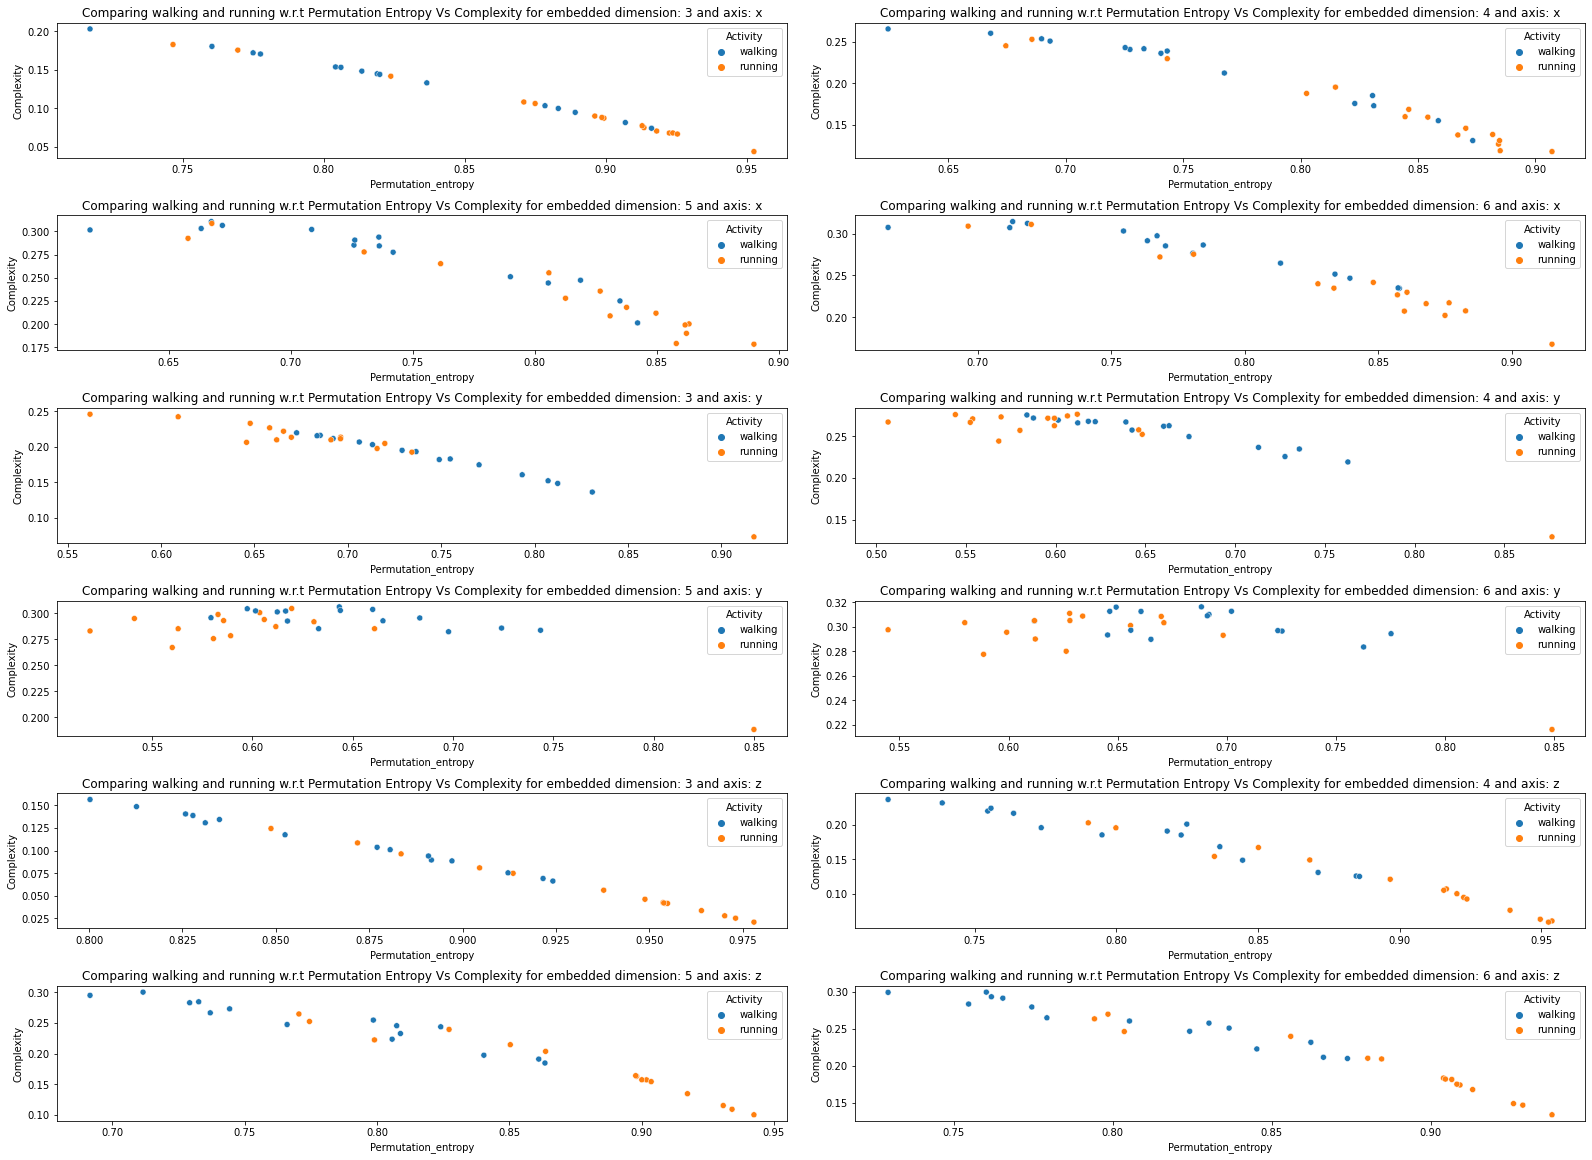

In [ ]:
part_3_activity = ['walking','running']
g, e_df = plt.subplots(6, 2, figsize=(22, 16),constrained_layout = True)
s_x = 0
s_y = 0
for axx in axis:
  #s_y = 0
  for dim in emb_dim:
    temp_df = entropy_chest[(entropy_chest.Subject.isin(subject_list)) & (entropy_chest.Activity.isin(part_3_activity))
                          & (entropy_chest['Accelerometer_Axis']==axx) & (entropy_chest['Dimension']==dim) & (entropy_chest['Signal_Length']==4096) & (entropy_chest['Delay']==1)]
    title = "Comparing walking and running w.r.t Permutation Entropy Vs Complexity for embedded dimension: {} and axis: {}".format(dim,axx)
    sns.scatterplot(ax = e_df[s_x][s_y], data = temp_df, x='Permutation_entropy', y='Complexity', hue = 'Activity').set_title(title)
    s_y = s_y + 1
    if s_y>1:
      s_y = 0
      s_x = s_x + 1

#### Permutation entropy Vs Complexity plots for Climbing up and Climbing down
Variables varied:

*   axis (x,y,z), embedded dimension (3,4,5,6)

Variables fixed:


*   Embdedded delay (1), Signal length (4096)

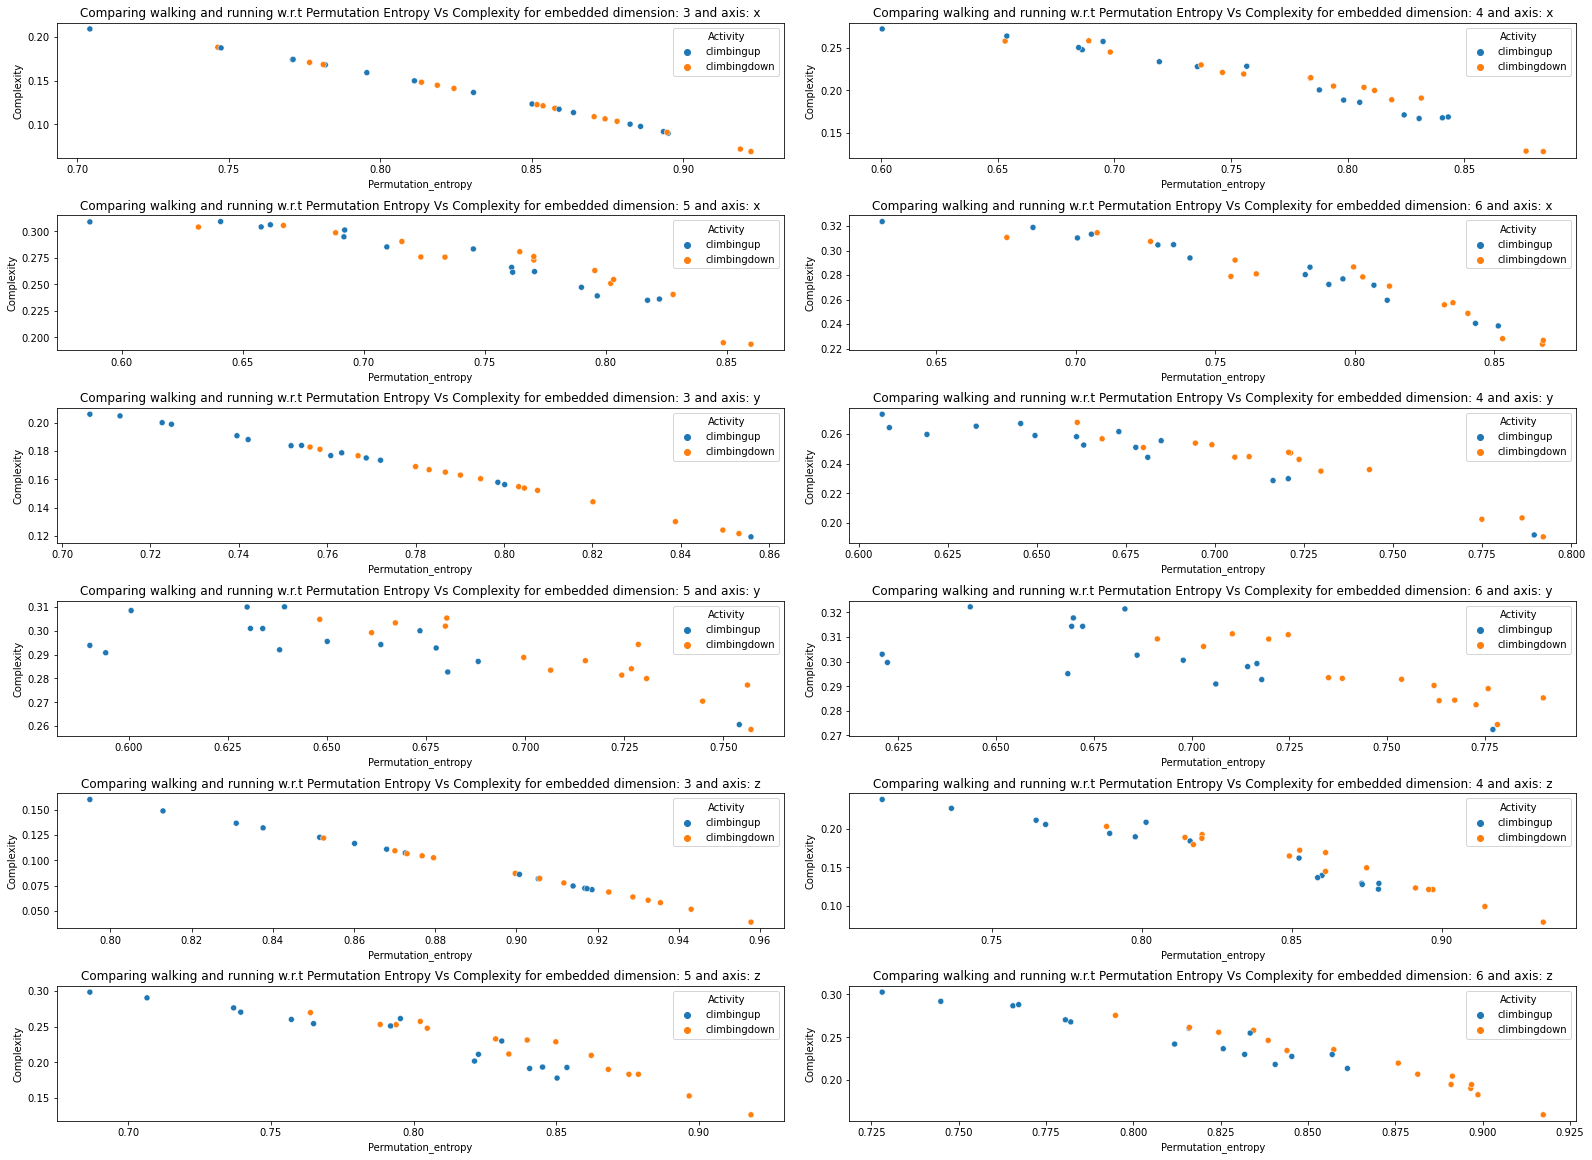

In [ ]:
part_4_activity = ['climbingdown','climbingup']
g, e_df = plt.subplots(6, 2, figsize=(22, 16),constrained_layout = True)
s_x = 0
s_y = 0
for axx in axis:
  #s_y = 0
  for dim in emb_dim:
    temp_df = entropy_chest[(entropy_chest.Subject.isin(subject_list)) & (entropy_chest.Activity.isin(part_4_activity))
                          & (entropy_chest['Accelerometer_Axis']==axx) & (entropy_chest['Dimension']==dim) & (entropy_chest['Signal_Length']==4096) & (entropy_chest['Delay']==1)]
    title = "Comparing walking and running w.r.t Permutation Entropy Vs Complexity for embedded dimension: {} and axis: {}".format(dim,axx)
    sns.scatterplot(ax = e_df[s_x][s_y], data = temp_df, x='Permutation_entropy', y='Complexity', hue = 'Activity').set_title(title)
    s_y = s_y + 1
    if s_y>1:
      s_y = 0
      s_x = s_x + 1

In [ ]:
!jupyter nbconvert --to html Project2_Group72.ipynb

[NbConvertApp] Converting notebook Project2_Group72.ipynb to html
[NbConvertApp] Writing 1799034 bytes to Project2_Group72.html
